In [1]:
# 필요한 utils
import pandas as pd
import numpy as np

In [4]:
# 3. csv 파일 불러오기
DATA_PATH = "/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/1.Data/"
train_df = pd.read_csv(DATA_PATH + "train.csv")
test_df = pd.read_csv(DATA_PATH + "test.csv")

subway_df = pd.read_csv(DATA_PATH + "subway_feature.csv")
bus_df = pd.read_csv(DATA_PATH + "bus_feature.csv")

/tmp/ipykernel_100921/517515685.py:3: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(DATA_PATH + "train.csv")


In [5]:
train_df.shape, test_df.shape

((1118822, 52), (9272, 51))

In [6]:
display(train_df.head(), test_df.head())
display(train_df.columns, test_df.columns)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,직영,4858.00,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,위탁,2724.46,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
3,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0


Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

In [7]:
display(train_df.info())
display(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   시군구                     1118822 non-null  object 
 1   번지                      1118597 non-null  object 
 2   본번                      1118747 non-null  float64
 3   부번                      1118747 non-null  float64
 4   아파트명                    1116696 non-null  object 
 5   전용면적(㎡)                 1118822 non-null  float64
 6   계약년월                    1118822 non-null  int64  
 7   계약일                     1118822 non-null  int64  
 8   층                       1118822 non-null  int64  
 9   건축년도                    1118822 non-null  int64  
 10  도로명                     1118822 non-null  object 
 11  해제사유발생일                 5983 non-null     float64
 12  등기신청일자                  1118822 non-null  object 
 13  거래유형                    1118822 non-null  object 
 14  중개

None

시군구                             0
번지                            225
본번                             75
부번                             75
아파트명                         2126
전용면적(㎡)                         0
계약년월                            0
계약일                             0
층                               0
건축년도                            0
도로명                             0
해제사유발생일                   1112839
등기신청일자                          0
거래유형                            0
중개사소재지                          0
k-단지분류(아파트,주상복합등등)         870691
k-전화번호                     870274
k-팩스번호                     872742
단지소개기존clob                1050240
k-세대타입(분양형태)               869563
k-관리방식                     869563
k-복도유형                     869890
k-난방방식                     869563
k-전체동수                     870630
k-전체세대수                    869563
k-건설사(시공사)                 871058
k-시행사                      871254
k-사용검사일-사용승인일              869696
k-연면적                      869563
k-주거전용면적      

In [8]:
# 3. 필요한 utils-2
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

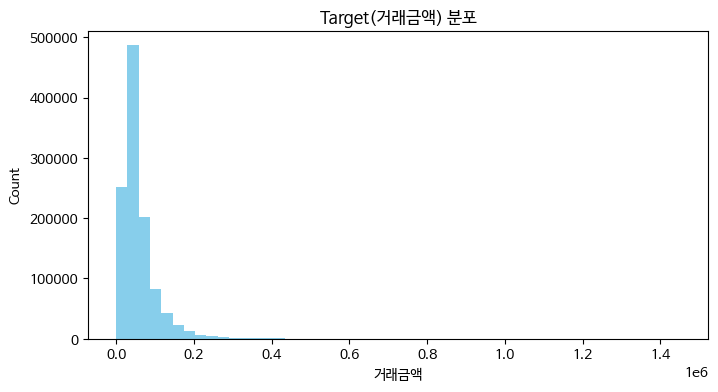

In [10]:
plt.figure(figsize=(8,4))
plt.hist(train_df['target'], bins=50, color='skyblue')
plt.title('Target(거래금액) 분포')
plt.xlabel('거래금액')
plt.ylabel('Count')
plt.show()

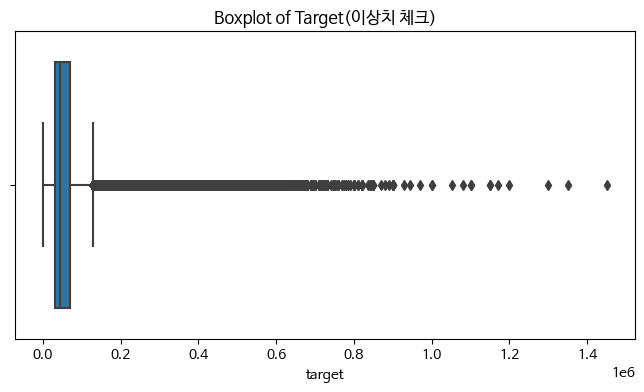

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x=train_df['target'])
plt.title('Boxplot of Target(이상치 체크)')
plt.show()

In [12]:
print(train_df.dtypes)

시군구                        object
번지                         object
본번                        float64
부번                        float64
아파트명                       object
전용면적(㎡)                   float64
계약년월                        int64
계약일                         int64
층                           int64
건축년도                        int64
도로명                        object
해제사유발생일                   float64
등기신청일자                     object
거래유형                       object
중개사소재지                     object
k-단지분류(아파트,주상복합등등)         object
k-전화번호                     object
k-팩스번호                     object
단지소개기존clob                float64
k-세대타입(분양형태)               object
k-관리방식                     object
k-복도유형                     object
k-난방방식                     object
k-전체동수                    float64
k-전체세대수                   float64
k-건설사(시공사)                 object
k-시행사                      object
k-사용검사일-사용승인일              object
k-연면적                     float64
k-주거전용면적      

In [13]:
# 연속형 범주와 범주형 변수 나눠보기 (1)
# 본번, 부본
train_df['본번'] = train_df['본번'].astype('str')
train_df['부번'] = train_df['부번'].astype('str')

In [14]:
# 연속형 범주와 범주형 변수 나눠보기 (2)

continuous_columns=[]
categorical_columns=[]

for col in train_df.columns:
  if pd.api.types.is_numeric_dtype(train_df[col]):
    continuous_columns.append(col)
  else:
    categorical_columns.append(col)

display(continuous_columns)
display(categorical_columns)

['전용면적(㎡)',
 '계약년월',
 '계약일',
 '층',
 '건축년도',
 '해제사유발생일',
 '단지소개기존clob',
 'k-전체동수',
 'k-전체세대수',
 'k-연면적',
 'k-주거전용면적',
 'k-관리비부과면적',
 'k-전용면적별세대현황(60㎡이하)',
 'k-전용면적별세대현황(60㎡~85㎡이하)',
 'k-85㎡~135㎡이하',
 'k-135㎡초과',
 '건축면적',
 '주차대수',
 '좌표X',
 '좌표Y',
 'target']

['시군구',
 '번지',
 '본번',
 '부번',
 '아파트명',
 '도로명',
 '등기신청일자',
 '거래유형',
 '중개사소재지',
 'k-단지분류(아파트,주상복합등등)',
 'k-전화번호',
 'k-팩스번호',
 'k-세대타입(분양형태)',
 'k-관리방식',
 'k-복도유형',
 'k-난방방식',
 'k-건설사(시공사)',
 'k-시행사',
 'k-사용검사일-사용승인일',
 'k-홈페이지',
 'k-등록일자',
 'k-수정일자',
 '고용보험관리번호',
 '경비비관리형태',
 '세대전기계약방법',
 '청소비관리형태',
 '기타/의무/임대/임의=1/2/3/4',
 '단지승인일',
 '사용허가여부',
 '관리비 업로드',
 '단지신청일']

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


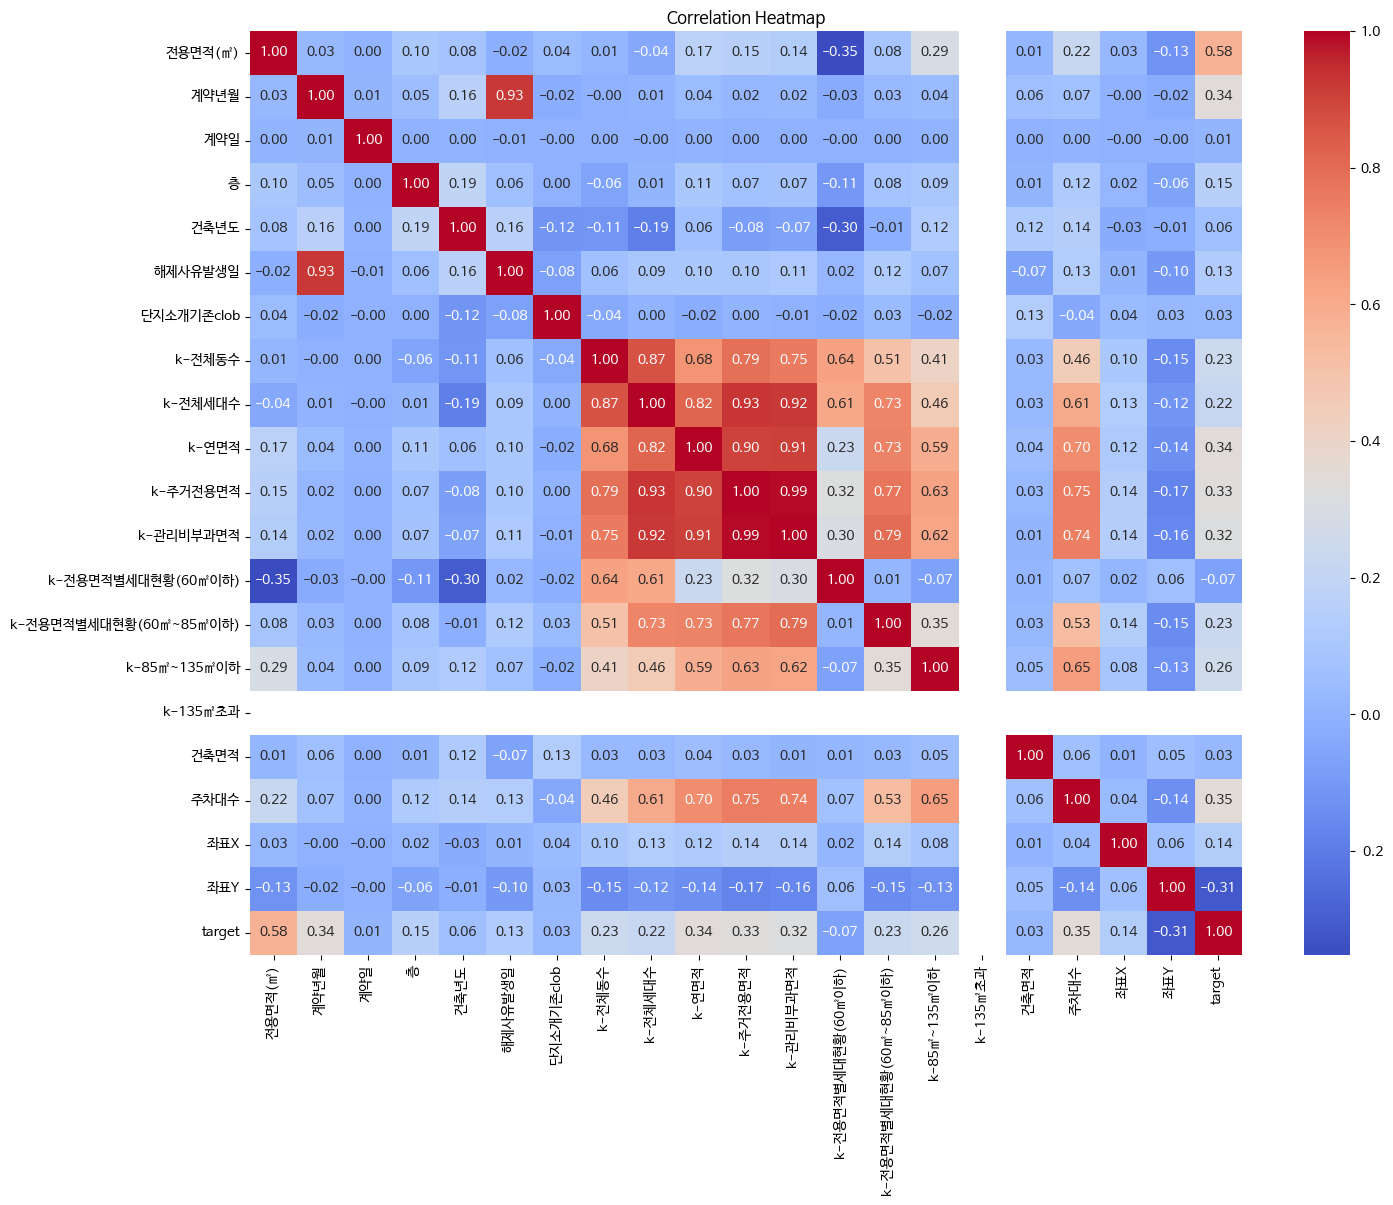

In [15]:
# 연속형 범주에 대해 heatmap 상관관계 분석해보기

plt.figure(figsize=(16,12))
corr = train_df[continuous_columns].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

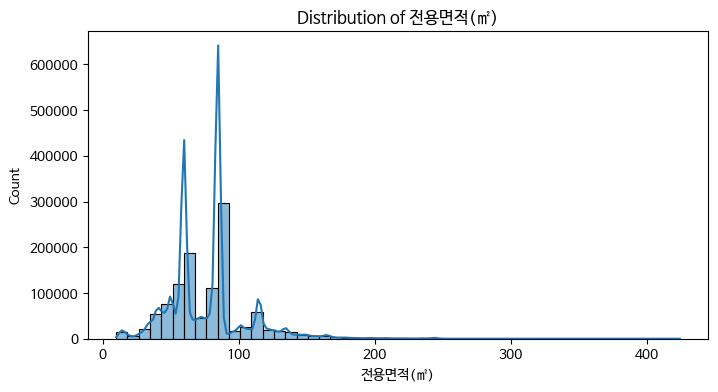

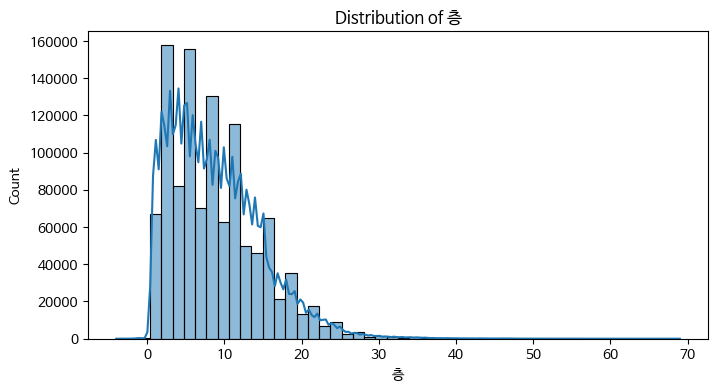

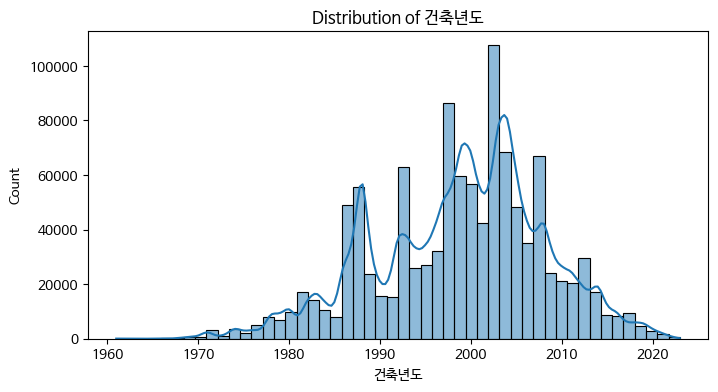

In [16]:
# 주요 수치형 변수 분포
num_cols = ['전용면적(㎡)', '층', '건축년도']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(train_df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [17]:
# 우리가 예측하려는 target 과 상관관계가 높은 feature 순서대로 나열해보기
corr_order = train_df[continuous_columns].corr()['target'].sort_values(ascending=False)
print(corr_order)


target                    1.000000
전용면적(㎡)                   0.577041
주차대수                      0.348141
계약년월                      0.344665
k-연면적                     0.343594
k-주거전용면적                  0.334076
k-관리비부과면적                 0.316773
k-85㎡~135㎡이하              0.257145
k-전체동수                    0.234470
k-전용면적별세대현황(60㎡~85㎡이하)    0.229618
k-전체세대수                   0.217512
층                         0.153176
좌표X                       0.135471
해제사유발생일                   0.126190
건축년도                      0.056041
단지소개기존clob                0.031012
건축면적                      0.026273
계약일                       0.009348
k-전용면적별세대현황(60㎡이하)       -0.069019
좌표Y                      -0.312180
k-135㎡초과                       NaN
Name: target, dtype: float64


In [18]:
# 결측치 간단하게 처리해보기 (1)
train_df.isnull().sum().sort_values(ascending=False)


k-135㎡초과                  1118495
해제사유발생일                   1112839
k-등록일자                    1107832
단지소개기존clob                1050240
k-홈페이지                    1005647
고용보험관리번호                   913304
세대전기계약방법                   878747
k-팩스번호                     872742
k-시행사                      871254
청소비관리형태                    871178
k-건설사(시공사)                 871058
경비비관리형태                    870988
k-단지분류(아파트,주상복합등등)         870691
k-전체동수                     870630
단지승인일                      870286
k-전화번호                     870274
k-복도유형                     869890
건축면적                       869714
주차대수                       869714
k-사용검사일-사용승인일              869696
좌표X                        869670
좌표Y                        869670
단지신청일                      869625
k-전용면적별세대현황(60㎡이하)         869608
k-전용면적별세대현황(60㎡~85㎡이하)     869608
k-주거전용면적                   869608
k-85㎡~135㎡이하               869608
k-수정일자                     869608
k-관리비부과면적                  869563
기타/의무/임대/임의=1/

In [19]:
# 결측치 간단하게 처리해보기 (2)
missing_ratio = train_df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.8].index
train_df = train_df.drop(columns=cols_to_drop)

In [20]:
# 결측치가 제거되었는지 확인
cols_to_drop = missing_ratio[missing_ratio > 0.8].index
cols_to_drop

Index(['해제사유발생일', '단지소개기존clob', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자', '고용보험관리번호'], dtype='object')

In [21]:
# 결측치 채우기 - 수치형은 중앙값으로, 범주형은 Unkown 으로
for col in continuous_columns:
  if col in train_df.columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())

for col in categorical_columns:
  if col in train_df.columns:
    train_df[col] = train_df[col].fillna('null')

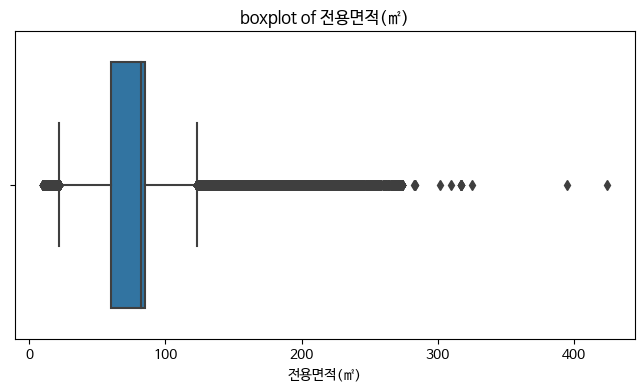

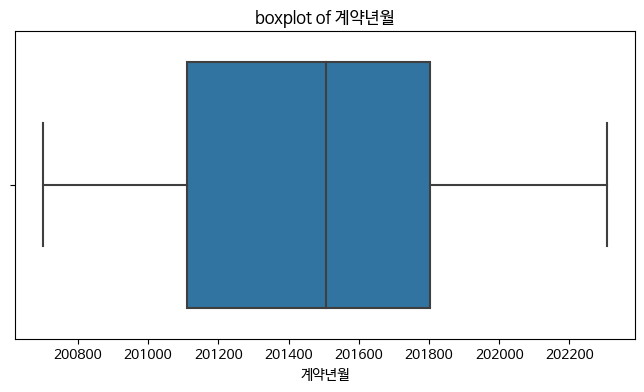

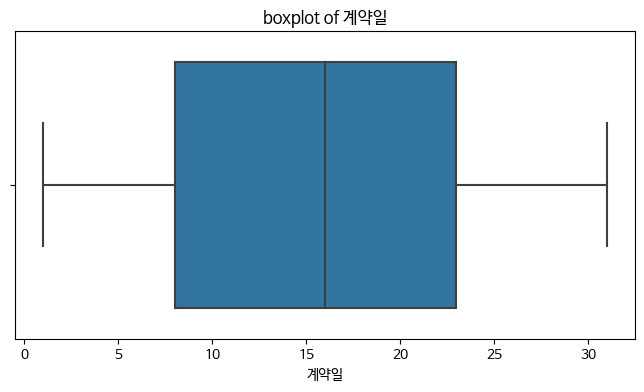

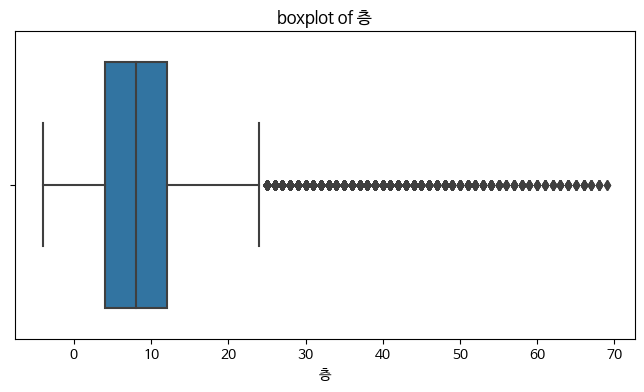

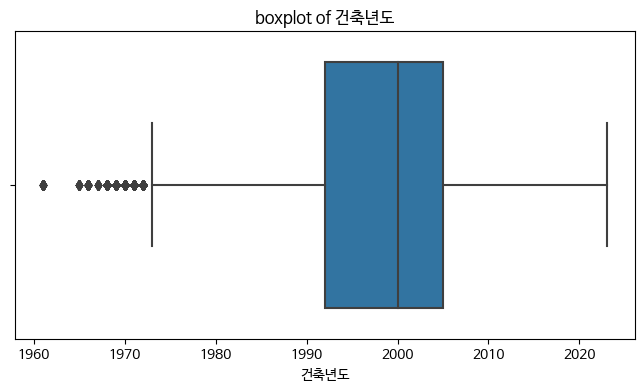

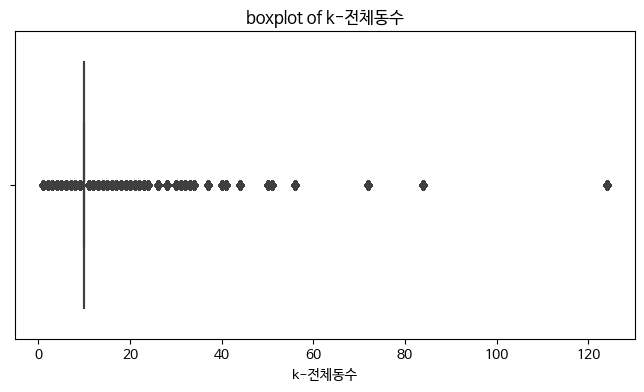

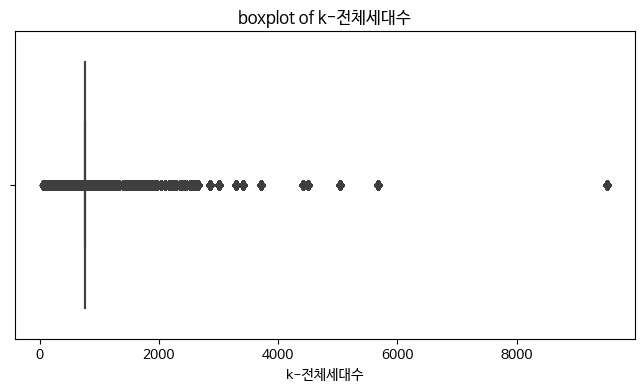

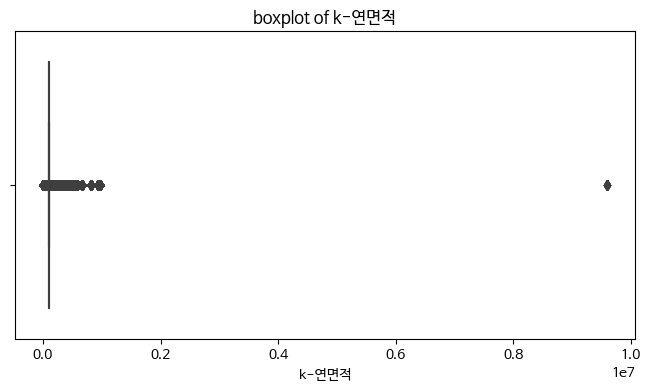

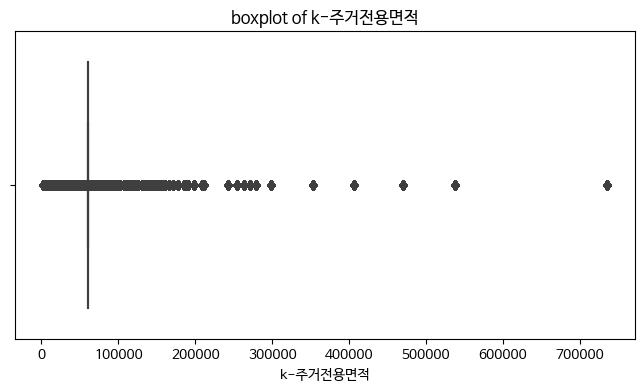

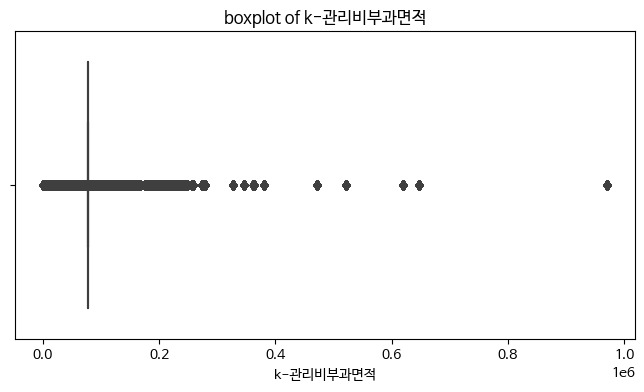

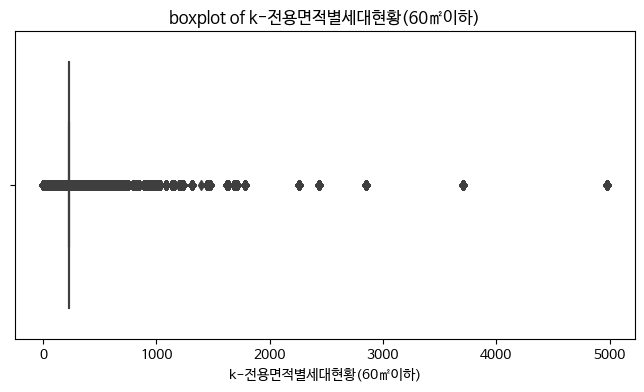

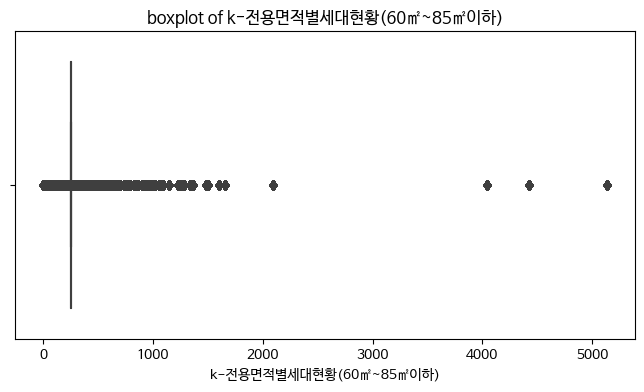

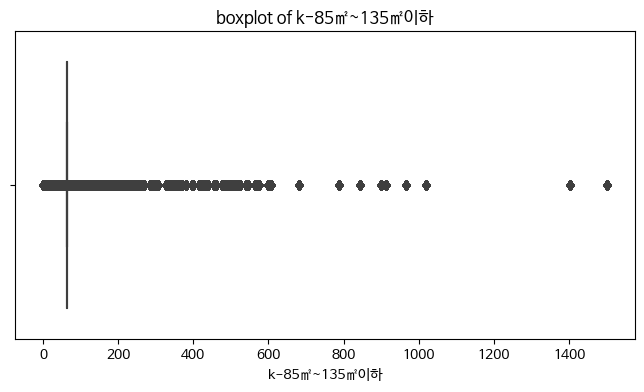

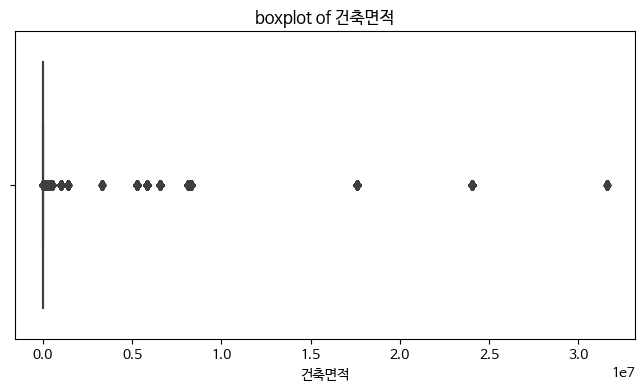

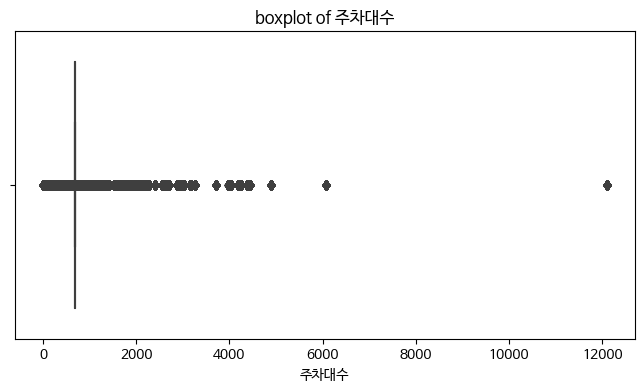

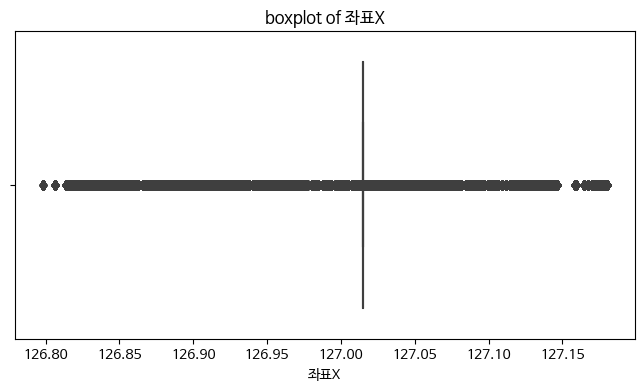

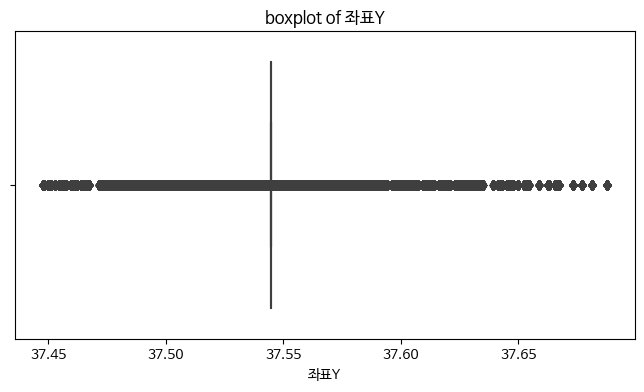

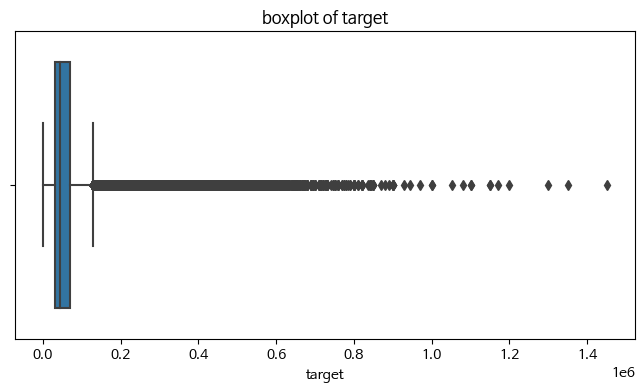

In [22]:
# 이상치 탐색
num_cols = train_df.select_dtypes(include=[np.number]).columns
for col in num_cols:
  plt.figure(figsize=(8,4))
  sns.boxplot(x=train_df[col])
  plt.title(f"boxplot of {col}")
  plt.show()

In [23]:
# IQR 함수화
def remove_iqr(df, col_name):
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  return df[(df[col_name] >= lower_bound) & (df[col_name]<= upper_bound)]

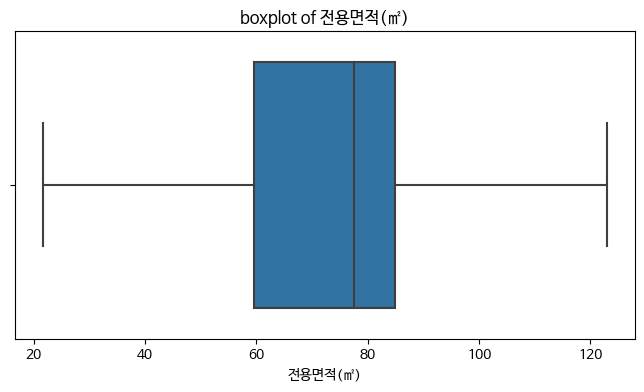

In [24]:
# IQR 로 이상치 제거
train_df = remove_iqr(train_df, '전용면적(㎡)')

# 제거 확인
plt.figure(figsize=(8,4))
sns.boxplot(x=train_df['전용면적(㎡)'])
plt.title('boxplot of 전용면적(㎡)')
plt.show()

In [25]:
# 범주형 변수를 모델이 인식할 수 있도록 encoding 진행 (1) 라이브러리 import
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
# 범주형 변수를 모델이 인식할 수 있도록 encoding 진행 (2) 범주형 변수만 추출 → encoding 진행
cat_cols_list = train_df.select_dtypes(include=['object']).columns

for col in cat_cols_list:
  train_df[col] = train_df[col].astype(str)
  test_df[col] = test_df[col].astype(str)

  le.fit(list(train_df[col]) + list(test_df[col]))

  train_df[col] = le.transform(list(train_df[col]))
  test_df[col] = le.transform(list(test_df[col]))


  print(train_df[cat_cols_list].head())


   시군구     번지     본번   부번    아파트명    도로명 등기신청일자 거래유형 중개사소재지  \
0    0  658-1  658.0  1.0  개포6차우성  언주로 3           -      -   
1    0  658-1  658.0  1.0  개포6차우성  언주로 3           -      -   
2    0  658-1  658.0  1.0  개포6차우성  언주로 3           -      -   
3    0  658-1  658.0  1.0  개포6차우성  언주로 3           -      -   
4    0  658-1  658.0  1.0  개포6차우성  언주로 3           -      -   

  k-단지분류(아파트,주상복합등등)  ...          k-사용검사일-사용승인일                 k-수정일자  \
0                아파트  ...  1987-11-21 00:00:00.0  2023-09-23 17:21:41.0   
1                아파트  ...  1987-11-21 00:00:00.0  2023-09-23 17:21:41.0   
2                아파트  ...  1987-11-21 00:00:00.0  2023-09-23 17:21:41.0   
3                아파트  ...  1987-11-21 00:00:00.0  2023-09-23 17:21:41.0   
4                아파트  ...  1987-11-21 00:00:00.0  2023-09-23 17:21:41.0   

  경비비관리형태 세대전기계약방법 청소비관리형태 기타/의무/임대/임의=1/2/3/4                  단지승인일 사용허가여부  \
0      직영     단일계약      직영                  임의  2022-11-17 13:00:29.0      Y   
1      직영 

In [27]:
#  파생 변수 만들어보기
# 1) 'distance_to_cbd' (중심업무지구 거리) : 도심 중심지(광화문, 강남역) 거리
# 2) 세대당 주차대수 = 주차대수 / 전체세대수
# 3) 한강까지의 거리  :

train_df['k-전체세대수'].isnull().mean()

0.0

In [28]:
display(train_df['좌표X'], train_df['좌표Y'])

print(train_df.columns)

0          127.057210
1          127.057210
2          127.057210
3          127.057210
4          127.057210
              ...    
1118817    126.905638
1118818    126.905638
1118819    126.905638
1118820    126.905638
1118821    127.000071
Name: 좌표X, Length: 1029574, dtype: float64

0          37.476763
1          37.476763
2          37.476763
3          37.476763
4          37.476763
             ...    
1118817    37.612962
1118818    37.612962
1118819    37.612962
1118820    37.612962
1118821    37.560706
Name: 좌표Y, Length: 1029574, dtype: float64

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호',
       'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수',
       'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적',
       'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)',
       'k-85㎡~135㎡이하', 'k-수정일자', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적',
       '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X',
       '좌표Y', '단지신청일', 'target'],
      dtype='object')


In [ ]:
# 파생변수 1. dist_to_CBD,  dist_to_Gangnam, dist_to_Yeouido

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lon2 - lon1)

    a = np.sin(d_phi/2.0)**2 + \
        np.cos(phi1)*np.cos(phi2)*np.sin(d_lambda/2.0)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# 중심지 좌표
# CBD 도심권(종로, 광화문) - 광화문 광장 위,경도 설정
# Gangnam - 강남역 사거리 위,경도 설정
# Yeouido - 여의도역 호선 출입구 위,경도 설정
center_coords = {
    'CBD':     (37.5714, 126.9768),
    'Gangnam': (37.4979, 127.0276),
    'Yeouido': (37.5219, 126.9245)
}

train_df['dist_to_CBD'] = train_df.apply(lambda row : haversine(row['좌표Y'], row['좌표X'], center_coords['CBD'][0],  center_coords['CBD'][1] ), axis=1)
train_df['dist_to_Gangnam'] = train_df.apply(lambda row : haversine(row['좌표Y'], row['좌표X'], center_coords['Gangnam'][0],  center_coords['Gangnam'][1] ), axis=1)
train_df['dist_to_Yeouido'] = train_df.apply(lambda row : haversine(row['좌표Y'], row['좌표X'], center_coords['Yeouido'][0],  center_coords['Yeouido'][1] ), axis=1)




In [68]:
test_df['dist_to_CBD'] = test_df.apply(lambda row : haversine(row['좌표Y'], row['좌표X'], center_coords['CBD'][0],  center_coords['CBD'][1] ), axis=1)
test_df['dist_to_Gangnam'] = test_df.apply(lambda row : haversine(row['좌표Y'], row['좌표X'], center_coords['Gangnam'][0],  center_coords['Gangnam'][1] ), axis=1)
test_df['dist_to_Yeouido'] = test_df.apply(lambda row : haversine(row['좌표Y'], row['좌표X'], center_coords['Yeouido'][0],  center_coords['Yeouido'][1] ), axis=1)

In [30]:
# 추가한 파생변수 3개와 target 의 상관관계 확인

print(train_df[['dist_to_CBD', 'dist_to_Gangnam', 'dist_to_Yeouido', 'target']].corr())

# target 과의 상관계수
# 0.00 ~ 0.10 → 거의 상관없음
# 0.10 ~ 0.30 → 약한 상관
# 0.30 ~ 0.50 → 보통 상관
# 0.50 이상 → 강한 상관

# 대부분 0.1 부근... → 거의 상관 없음 ㅠㅠ

                 dist_to_CBD  dist_to_Gangnam  dist_to_Yeouido    target
dist_to_CBD         1.000000         0.620665         0.589190  0.103629
dist_to_Gangnam     0.620665         1.000000         0.366526 -0.100443
dist_to_Yeouido     0.589190         0.366526         1.000000  0.020574
target              0.103629        -0.100443         0.020574  1.000000


In [31]:
# 파생변수 2. 세대 당 주차대수 = 주차대수/k-전체세대수

train_df['parking_per_household'] = (train_df['주차대수'] / train_df['k-전체세대수'].replace(0, np.nan)).fillna(0)
test_df['parking_per_household'] = (test_df['주차대수'] / test_df['k-전체세대수'].replace(0, np.nan)).fillna(0)

In [32]:
train_df['parking_per_household'].head()

0    0.97037
1    0.97037
2    0.97037
3    0.97037
4    0.97037
Name: parking_per_household, dtype: float64

In [33]:
# 파생변수 2. 세대 당 주차대수와 target 의 상관관계 분석
print(train_df[['parking_per_household', 'target']].corr())

# 상관계수가 0.158 → 약한 상관관계가 있으나, 강력한 단일 예측 변수는 아니다.

                       parking_per_household    target
parking_per_household               1.000000  0.157739
target                              0.157739  1.000000


In [37]:
# 5. 모델 선택 ( RandomForest )
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train, test 데이터 분리   
X = train_df.drop(columns=['target'])
y = train_df['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

#  예측
y_pred = model.predict(X_valid)


# 성능 평가
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE : {rmse:.2f}")


Validation RMSE : 15169.76


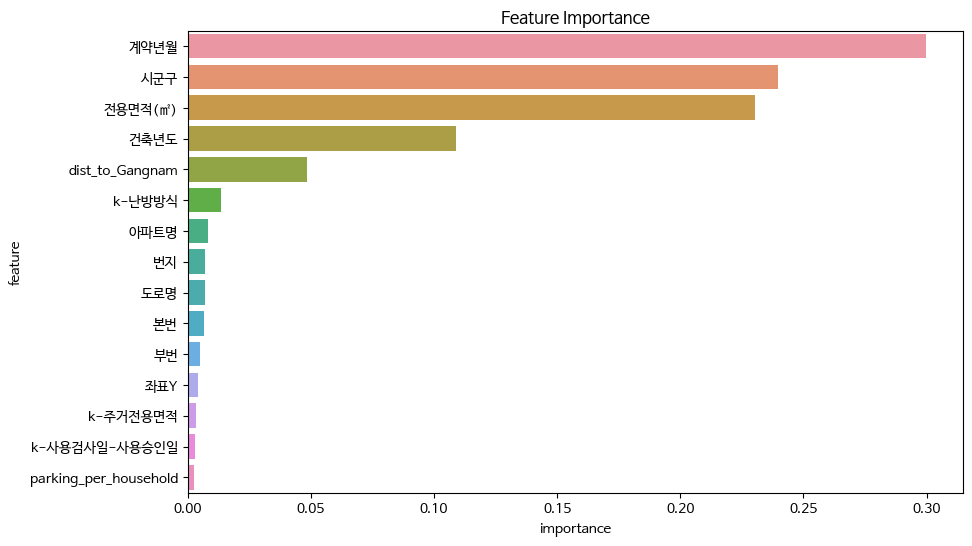

In [41]:
# Feature Importance 시각화
importances = model.feature_importances_
feature_names = X_train.columns

imp = pd.DataFrame({
    'feature': feature_names, 'importance': importances
    }).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=imp.head(15))
plt.title('Feature Importance')
plt.show()

In [97]:
# 모델 저장하기
import joblib
joblib.dump(model, 'rf_model_250709_v1.joblib')

['rf_model_250709_v1.joblib']

In [43]:
loaded_model = joblib.load('randomforest_model.joblib')
y_test_pred = loaded_model.predict(X_valid)
np.allclose(y_test_pred, y_pred)

True

In [44]:
# permutation_importance 
from sklearn.inspection import permutation_importance

In [45]:
result = permutation_importance(
    loaded_model,
    X_valid, 
    y_valid,
    n_repeats = 30,
    random_state=42,
    n_jobs=-1
)

In [46]:
permutation_df = pd.DataFrame({
    'feature': X_valid.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

permutation_df.head(10)

,feature,importance_mean,importance_std
6,계약년월,0.612129,0.002486
0,시군구,0.417676,0.002479
5,전용면적(㎡),0.364646,0.003271
9,건축년도,0.162638,0.001558
46,dist_to_Gangnam,0.076186,0.001196
20,k-난방방식,0.046872,0.000793
48,parking_per_household,0.014089,0.000656
10,도로명,0.012414,0.000202
4,아파트명,0.012192,0.000406
3,부번,0.008200,0.000228


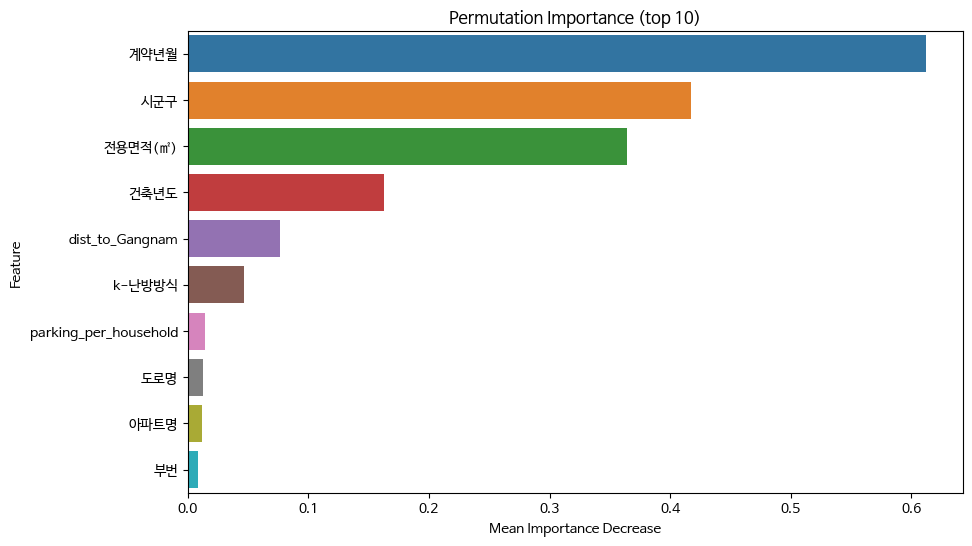

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance_mean', y='feature', data=permutation_df.head(10))
plt.title('Permutation Importance (top 10)')
plt.xlabel('Mean Importance Decrease')
plt.ylabel('Feature')
plt.show()

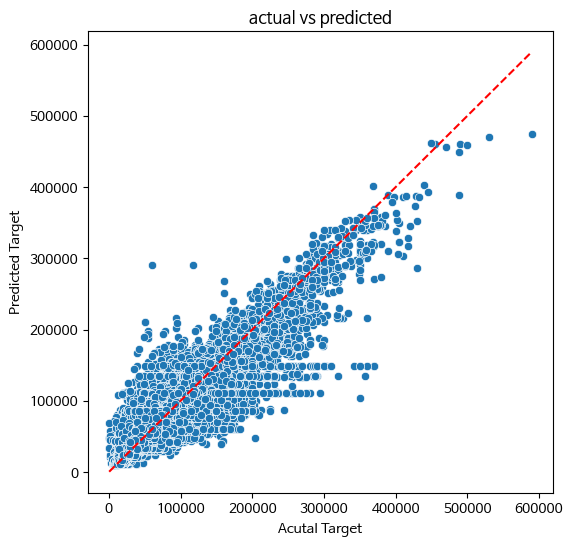

In [ ]:
# 예측 vs 실제  (1) scatter plot 

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_valid, y=y_pred)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()],'r--' )
plt.title('actual vs predicted')
plt.xlabel('Acutal Target')
plt.ylabel('Predicted Target')
plt.show()

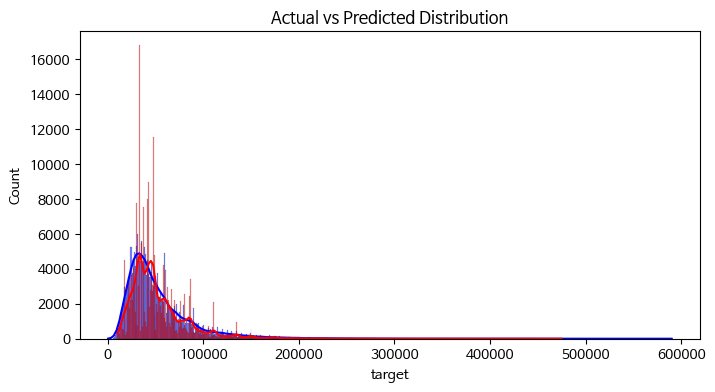

In [52]:
# 예측 vs 실제  (2) histoplot

plt.figure(figsize=(8,4))
sns.histplot(y_valid, color='blue', label='Acutal', kde=True)
sns.histplot(y_pred, color='red', label='Predicted', kde=True)
plt.title('Actual vs Predicted Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


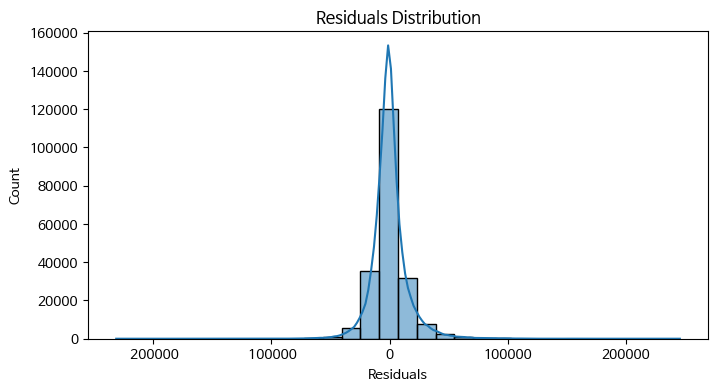

In [53]:
# 예측 vs 실제  (3) 잔차 분포

residuals = y_valid - y_pred

plt.figure(figsize=(8,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


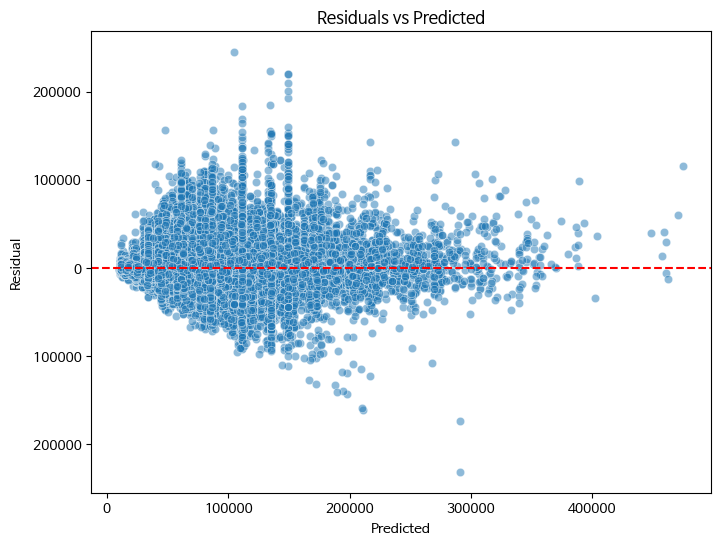

In [54]:
# residual vs predicted 
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5 )
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


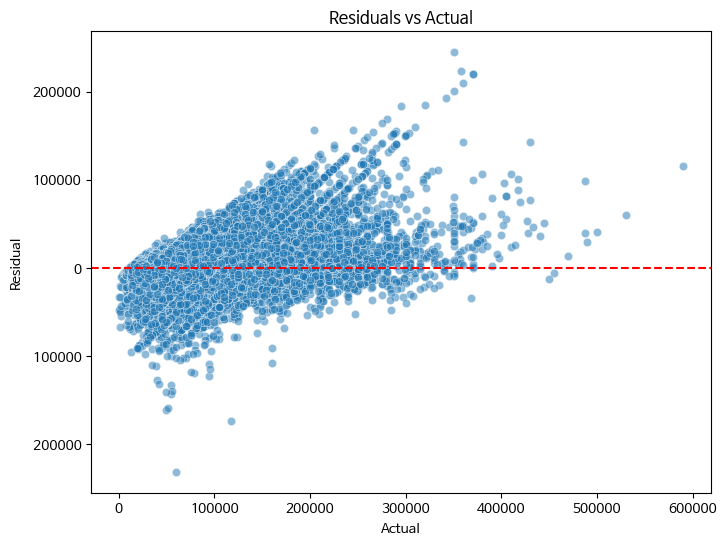

In [55]:
# residual vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_valid, y=residuals, alpha=0.5 )
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title('Residuals vs Actual')
plt.show()

In [57]:
# 로그 변환 실험
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)


print(y_train.head())
print(y_train_log.head())

166928    47500
432907    31000
332970    36500
983238    18300
624068    48500
Name: target, dtype: int64
166928    10.768506
432907    10.341775
332970    10.505095
983238     9.814711
624068    10.789340
Name: target, dtype: float64


In [58]:
rf_log_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_log_model.fit(X_train, y_train_log)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [98]:
# log 데이터로 학습한 모델 저장
joblib.dump(rf_log_model, 'rf_log_model_250709_v1.joblib')

['rf_log_model_250709_v1.joblib']

In [60]:
# 로그 데이터 학습한 모델로 재 예측
y_pred_log = rf_log_model.predict(X_valid)

# target 예측값을 다시 원래 스케일대로 역변환
y_pred = np.expm1(y_pred_log)

print(y_pred[:5])

[59384.88251854 18190.9086432  38379.93932708 23483.05308458
 31393.12574856]


In [61]:
#  다시 rmse 로 재평가
rmse_log = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"Validation RMSE after log transformation: {rmse_log:.2f}")

Validation RMSE after log transformation: 4716.66


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


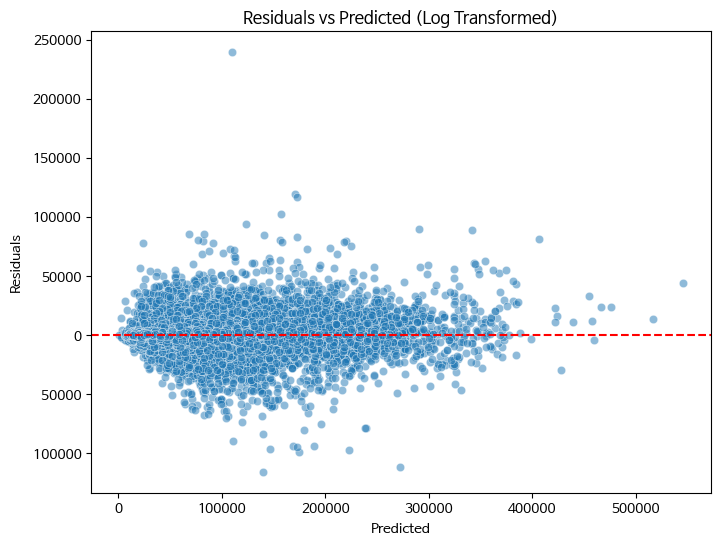

In [62]:
# 모델 개선 여부 시각화 (1) residuals

residuals_log = y_valid - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Log Transformed)')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


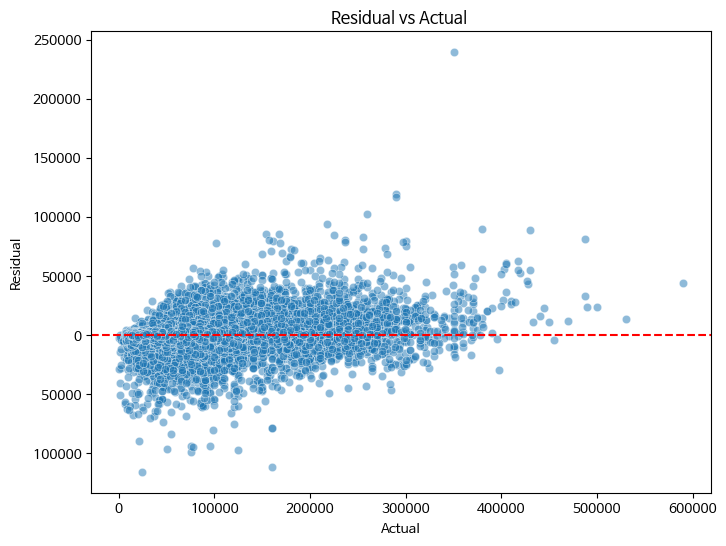

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_valid, y=residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title('Residual vs Actual ')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


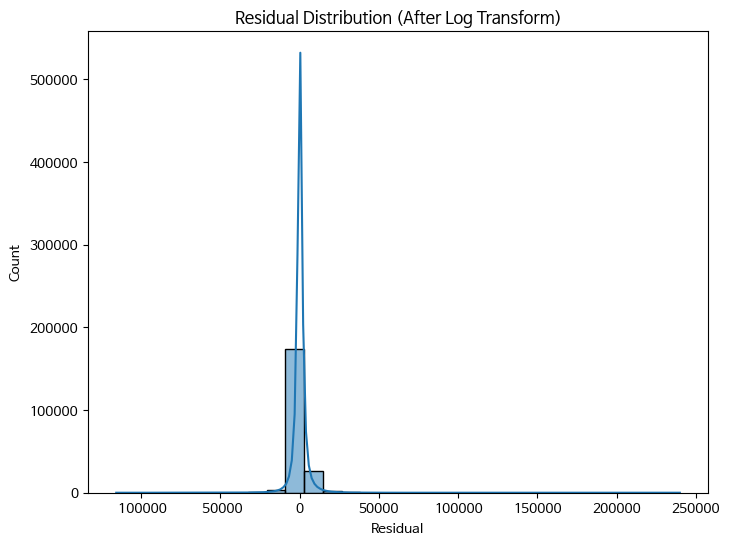

In [64]:
plt.figure(figsize=(8,6))
sns.histplot(residuals_log, bins=30, kde=True)
plt.title('Residual Distribution (After Log Transform)')
plt.xlabel('Residual')
plt.show()

In [65]:
print(residuals.describe())

count    205915.000000
mean         20.057494
std       15169.778659
min     -231159.448303
25%       -7148.845141
50%        -919.776816
75%        5522.636167
max      245427.484760
Name: target, dtype: float64


In [66]:
# test_df = pd.read_csv(DATA_PATH + "test.csv")

print(test_df.shape)
test_df.head()


(9272, 52)


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,parking_per_household
0,0,4363,1123,1,304,79.9700,202307,26,5,1987,...,4858.00,262.0,5,716,0,0,127.057210,37.476763,244,0.970370
1,0,4339,1116,1,305,108.2017,202308,15,10,2021,...,2724.46,305.0,3,711,0,0,127.056394,37.484892,239,1.314655
2,0,4340,1117,0,309,161.0000,202307,28,15,1984,...,61064.24,419.0,3,2,0,0,127.055990,37.483894,16,1.034568
3,0,4340,1117,0,309,133.4600,202308,10,14,1984,...,61064.24,419.0,3,2,0,0,127.055990,37.483894,16,1.034568
4,0,4340,1117,0,309,104.4300,202308,18,6,1984,...,61064.24,419.0,3,2,0,0,127.055990,37.483894,16,1.034568


In [75]:
# 전처리를 test_df에 동일하게 적용하지 않았던 문제 발생 → test_df와 train_df 의 컬럼을 맞추는 작업 필요...
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)
test_df = test_df.drop(columns='target') 

test_df = test_df.fillna(0)


In [76]:
test_df.head()

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,dist_to_CBD,dist_to_Gangnam,dist_to_Yeouido,parking_per_household
0,0,4363,1123,1,304,79.9700,202307,26,5,1987,...,716,0,0,127.057210,37.476763,244,12.689456,3.514175,12.737848,0.970370
1,0,4339,1116,1,305,108.2017,202308,15,10,2021,...,711,0,0,127.056394,37.484892,239,11.907774,2.923346,12.341068,1.314655
2,0,4340,1117,0,309,161.0000,202307,28,15,1984,...,2,0,0,127.055990,37.483894,16,11.976782,2.949456,12.345051,1.034568
3,0,4340,1117,0,309,133.4600,202308,10,14,1984,...,2,0,0,127.055990,37.483894,16,11.976782,2.949456,12.345051,1.034568
4,0,4340,1117,0,309,104.4300,202308,18,6,1984,...,2,0,0,127.055990,37.483894,16,11.976782,2.949456,12.345051,1.034568


In [86]:
y_test_pred_log = rf_log_model.predict(test_df)
y_test_pred = np.expm1(y_test_pred_log)

y_test_pred = np.round(y_test_pred).astype(int)

In [87]:
print(y_test_pred[:5])

[190553 287225 286909 286952 221475]


In [88]:
submission = pd.DataFrame({
    'target':y_test_pred
})

In [89]:
submission.head()

,target
0,190553
1,287225
2,286909
3,286952
4,221475


In [90]:
assert len(test_df) == len(y_test_pred), "제출 행의 갯수 불일치"

In [93]:
print(submission.dtypes)

target    int64
dtype: object


In [94]:
submission.to_csv('/data/ephemeral/home/workspace/upstageailab-ml-competition-ml-2/4.Submission/sub_250709_rf_v1.csv', index=False)